In [41]:
import pyarrow as pa
import pyarrow.parquet as pq
import pyarrow.dataset as ds

import pandas as pd
import numpy as np
from datetime import date

import matplotlib.pylab as plot
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, YearLocator, DateFormatter

In [57]:
start_date = '2008-01-01'

In [58]:
oil_futures_path = 'https://www.eia.gov/dnav/pet/hist_xls/RCLC1d.xls'
oil_prices_path = 'https://www.eia.gov/dnav/pet/hist_xls/RBRTEd.xls'

In [59]:
oil_futures = pd.read_excel(oil_futures_path,
                           sheet_name='Data 1',
                           skiprows=4,
                           names=['SpotDate', 'SpotPrice'])

oil_prices = pd.read_excel(oil_prices_path,
                           sheet_name='Data 1',
                           skiprows=4,
                           names=['PriceDate', 'Price'])

In [60]:
oil_futures = oil_futures[(oil_futures.SpotDate.apply(
    lambda x: pd.Timestamp(x).date()) >= pd.Timestamp(start_date).date())]

oil_prices = oil_prices[(oil_prices.PriceDate.apply(
    lambda x: pd.Timestamp(x).date()) >= pd.Timestamp(start_date).date())]

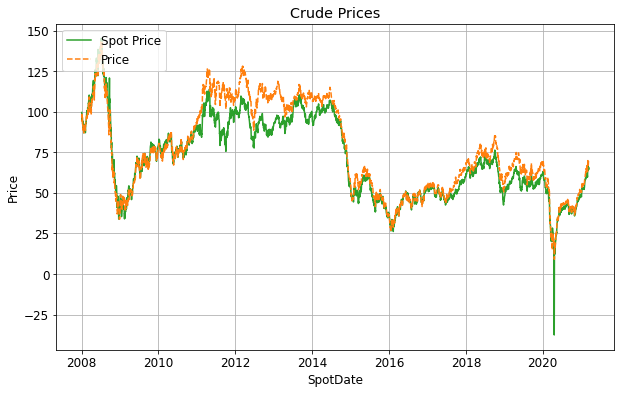

In [61]:
#fig = plt.figure()
fig, ax = plt.subplots(figsize=(10, 6))
plt.rc('font', size=12)
ax.plot(oil_futures['SpotDate'],
            oil_futures['SpotPrice'],
            color='tab:green', 
            label='Spot Price'
        )
ax.set_xlabel('SpotDate')
ax.set_ylabel('Price')
ax.grid(True)
ax.legend(loc='upper left')

ax.plot(oil_prices['PriceDate'], 
        oil_prices['Price'], 
        color='tab:orange', 
        linestyle='--',
        label='Price')
ax.set_title('Crude Prices')
ax.legend(loc='upper left')